#### Business understanding
--------------------------------

### Data understanding
    
This dataset contains the locations of customers. The dataset has the following columns:  
   - ***clientid*** : The unique identifier for the customer
   - ***x*** : The x coordinate of the customer's location, when plotted into a 2D plane
   - ***y*** : The y coordinate of the customer's location, when plotted into a 2D plane

The dataset has 5936 rows of data and has no missing values or outliers.

In [204]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# read dataframe from local file
df = pd.read_csv('data/drone_cust_locations.csv', sep=';')
df 

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
...,...,...,...
5951,5952,832.857394,616.861410
5952,5953,242.734500,490.325092
5953,5954,108.690847,758.833921
5954,5955,803.251074,430.740623


### Data preparation
Since id is not a useful feature for clustering, we will drop it. a 

In [205]:
df.drop('clientid', axis=1, inplace=True)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


we plot the data so we can see visually how the customers are located in the 2D plane.
we can see from the data that it contains somekind of unoccupied zone in the middle maybe a road or a river, but there still seems to be couple of the customers in it so a big river with an island(?).
also the customers are not evenly distributed in the area. This uneven distribution may impact clustering performance.

<Axes: xlabel='x', ylabel='y'>

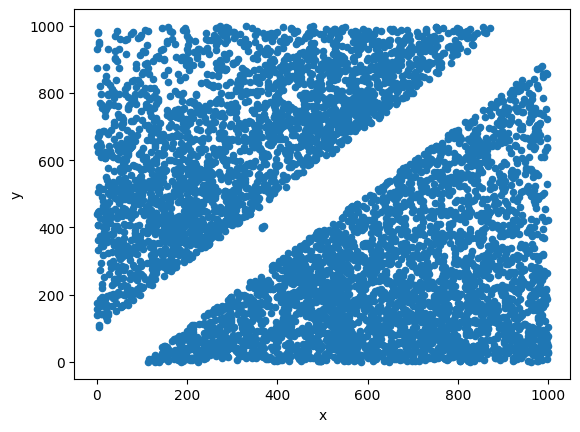

In [206]:
df.plot.scatter(x='x', y='y')
# Miten tän tulkitsee? Keskellä on tie/joki/metsä/pelto ??

## Modelling
First, we used the ***WCSS (Within-Cluster Sum of Squares)*** method to determine the optimal number of clusters. Based on the elbow method, the most suitable choice appeared to be ***5 clusters*** , we calculated the silhouette score, which resulted in 0.42, indicating moderate clustering accuracy with some overlap between clusters ie hubs will have some but minimal shared customers.

##### Calculate WCSS

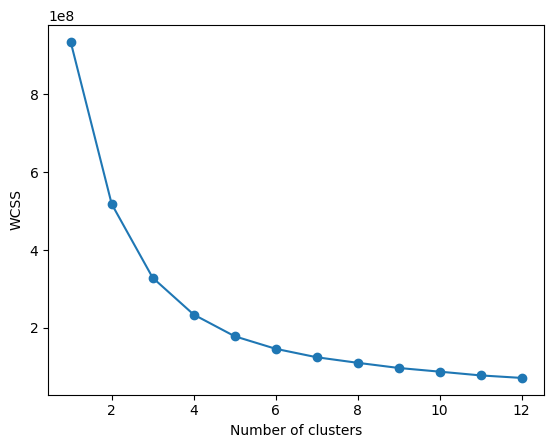

In [207]:

wcss = []
for i in range(1,13):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(df)
    wcss.append(model.inertia_)
    
plt.plot(list(range(1,13)), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### calculate silhouette score

In [208]:
from sklearn.metrics import silhouette_score

numnber_of_depots = 5
model = KMeans(init='random', n_clusters=numnber_of_depots, random_state=42).fit(df)
labels = model.labels_
print('Silhouette score = %.2f' % silhouette_score(df, labels))


Silhouette score = 0.42


Attach the information on the closest depot to each client in the dataframe.

In [209]:
labels2 = model.fit_predict(df)
cluster_locations = model.cluster_centers_
df["Depot"] = labels + 1
print(df.head(10))

            x           y  Depot
0  622.771572  164.857623      3
1  416.357298  630.193634      4
2  292.735020  567.333231      1
3  737.211288  166.225676      3
4  540.475375  682.912298      4
5  535.469492  318.439661      2
6  640.380050  870.833221      4
7  235.772075  359.048203      1
8  481.896884  661.491838      4
9  730.032789  312.177817      3


### Evaluation

We plotted the data along with the depot locations to visualize how customers are distributed among them. The depots, marked with **red dots**, appear to be **well-positioned near the center of their respective clusters**, which is a positive indicator of effective placement.

At first glance, the customers seem to be **evenly distributed among the depots**, but to confirm this, we analyzed the actual number of customers assigned to each depot:

- **Depot 1**: 1,356  
- **Depot 2**: 1,325  
- **Depot 3**: 1,160  
- **Depot 4**: 1,282  
- **Depot 5**: 833  

Based on this distribution, we can conclude that the customer allocation is moderately even, though Depot 5 has significantly fewer customers than the others. So Depot 5 could be a bit smaller than others.




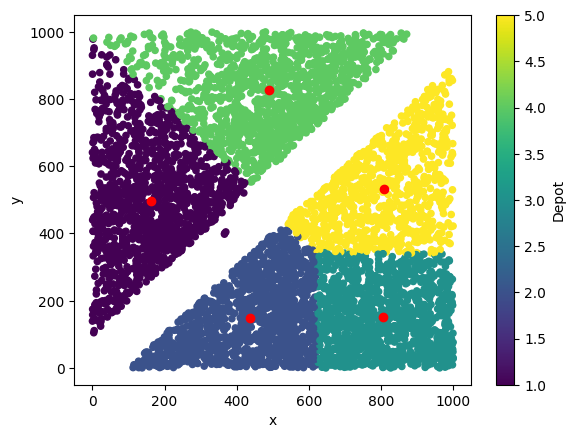

In [210]:
df.plot.scatter(x='x', y='y', c='Depot', cmap='viridis')
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red')

In [211]:
df["Depot"].value_counts()

Depot
1    1356
2    1325
4    1282
3    1160
5     833
Name: count, dtype: int64

In [212]:

df2 = pd.read_csv('data/drone_cust_locations.csv', sep=';')

dropped_data = df2.drop(columns=['clientid'])

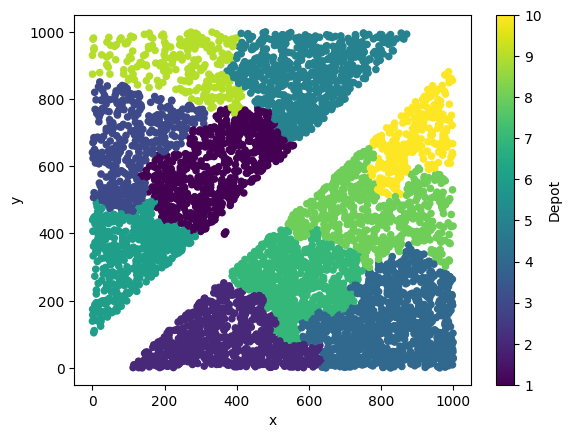

In [213]:
# Discuss the differences in this context.
# KMeans:in klusterit ovat symmetrisempiä kokoavan hierarkisen klusteroinnin klustereihin verrattuna

model = AgglomerativeClustering(n_clusters=10)
model.fit(dropped_data)
df2['Depot'] = model.labels_ + 1
df2.plot.scatter(x="x", y="y", c='Depot', cmap="viridis");